In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Data Loading and Preprocessing

# Load the CSV data using pandas
data = pd.read_csv("heart-disease.csv") 

In [3]:

# Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
# Handle missing values (replace with appropriate strategy based on data)
# For example, impute with mean/median or drop rows with missing values
# data = data.fillna(data.mean())  # Replace with your chosen imputation strategy

# Convert categorical variables into dummy/indicator variables
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
data = pd.get_dummies(data, columns=categorical_features)

In [6]:
# 2. Data Analysis

# Average age of patients with and without heart disease
average_age_with_disease = data[data["target"] == 1]["age"].mean()
average_age_without_disease = data[data["target"] == 0]["age"].mean()

print(
    f"Average age with heart disease: {average_age_with_disease:.2f} years old"
)
print(
    f"Average age without heart disease: {average_age_without_disease:.2f} years old"
)


Average age with heart disease: 52.50 years old
Average age without heart disease: 56.60 years old


In [10]:
# Correlation between thalach (maximum heart rate) and age
correlation_thalach_age = data["thalach"].corr(data["age"])
print(f"Correlation between thalach and age: {correlation_thalach_age:.2f}")

Correlation between thalach and age: -0.40


In [27]:
print(data.columns)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1',
       'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0',
       'slope_1', 'slope_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')


In [28]:
# Calculate the distribution of chest pain types
cp_0_count = data["cp_0"].sum()
cp_1_count = data["cp_1"].sum()
cp_2_count = data["cp_2"].sum()
cp_3_count = data["cp_3"].sum()

# Print the distribution of chest pain types
print("Distribution of chest pain types:")
print("Type 0:", cp_0_count)
print("Type 1:", cp_1_count)
print("Type 2:", cp_2_count)
print("Type 3:", cp_3_count)


Distribution of chest pain types:
Type 0: 143
Type 1: 50
Type 2: 87
Type 3: 23


In [30]:
# Check the column names in your DataFrame
print("Column names in the DataFrame:")
print(data.columns)

# Check the data types of each column
print("\nData types of each column:")
print(data.dtypes)

# Check the first few rows of the DataFrame to see if the data looks as expected
print("\nFirst few rows of the DataFrame:")
print(data.head())

Column names in the DataFrame:
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1',
       'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0',
       'slope_1', 'slope_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

Data types of each column:
age            int64
trestbps       int64
chol           int64
thalach        int64
oldpeak      float64
ca             int64
target         int64
sex_0           bool
sex_1           bool
cp_0            bool
cp_1            bool
cp_2            bool
cp_3            bool
fbs_0           bool
fbs_1           bool
restecg_0       bool
restecg_1       bool
restecg_2       bool
exang_0         bool
exang_1         bool
slope_0         bool
slope_1         bool
slope_2         bool
thal_0          bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

First few rows of the DataFrame:
   age  

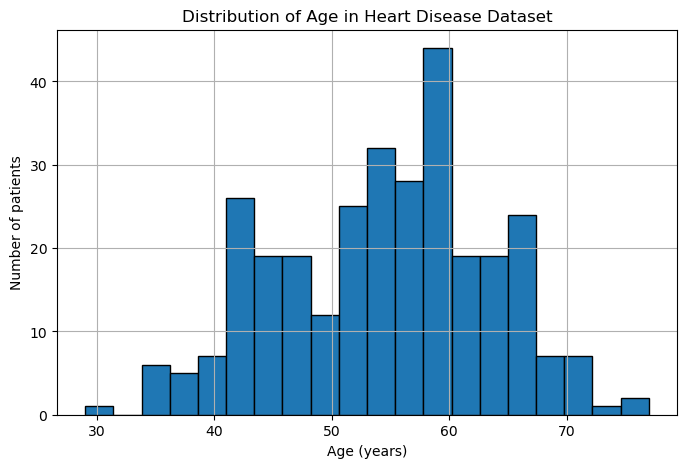

In [12]:
# 3. Data Visualization

# Histogram of age distribution
plt.figure(figsize=(8, 5))
plt.hist(data["age"], bins=20, edgecolor="black")
plt.xlabel("Age (years)")
plt.ylabel("Number of patients")
plt.title("Distribution of Age in Heart Disease Dataset")
plt.grid(True)
plt.show()

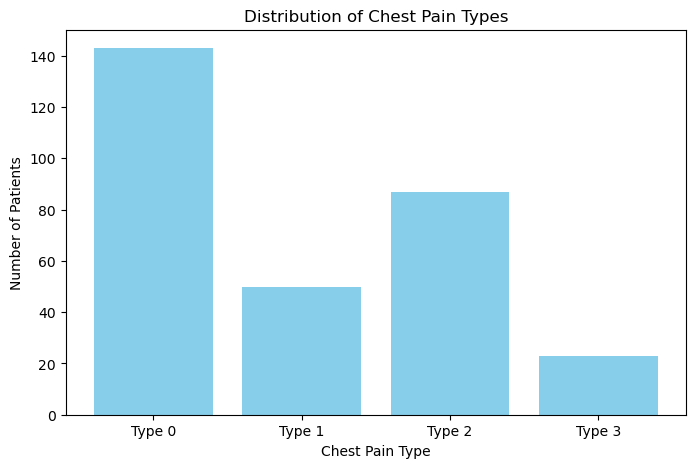

In [34]:
# Bar chart for chest pain types
import matplotlib.pyplot as plt

# Define the chest pain types and their counts
chest_pain_types = ['Type 0', 'Type 1', 'Type 2', 'Type 3']
chest_pain_counts = [cp_0_count, cp_1_count, cp_2_count, cp_3_count]

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(chest_pain_types, chest_pain_counts, color='skyblue')

# Add labels and title
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.title('Distribution of Chest Pain Types')

# Show the plot
plt.show()


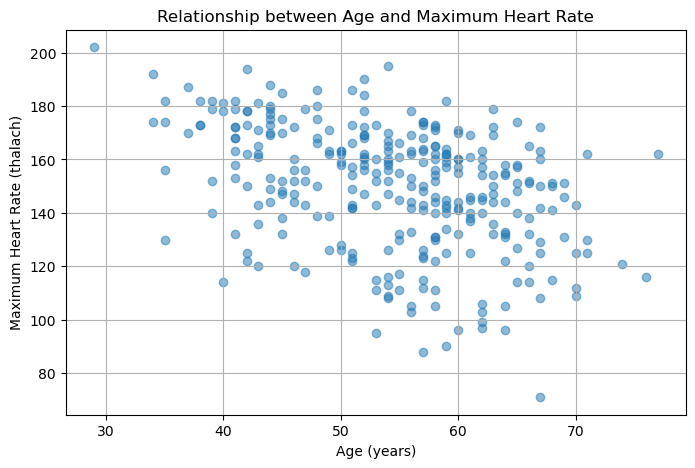

In [14]:
# Scatter plot: thalach vs age
plt.figure(figsize=(8, 5))
plt.scatter(data["age"], data["thalach"], alpha=0.5)
plt.xlabel("Age (years)")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.title("Relationship between Age and Maximum Heart Rate")
plt.grid(True)
plt.show()

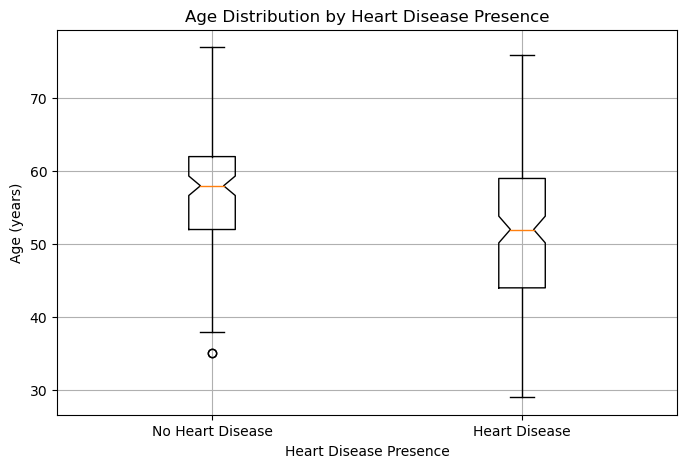

In [15]:
# Box plot: age distribution by heart disease presence
plt.figure(figsize=(8, 5))
plt.boxplot([data[data["target"] == 0]["age"], data[data["target"] == 1]["age"]],
             notch=True, labels=["No Heart Disease", "Heart Disease"])
plt.xlabel("Heart Disease Presence")
plt.ylabel("Age (years)")
plt.title("Age Distribution by Heart Disease Presence")
plt.grid(True)
plt.show()

In [16]:
# 4. Advanced Analysis (using numpy)

# Correlation matrix for numerical features
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
correlation_matrix = data[numerical_features].corr(method="spearman")  # Spearman rank correlation

print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.285617  0.195786 -0.398052  0.268291
trestbps  0.285617  1.000000  0.126562 -0.040407  0.154267
chol      0.195786  0.126562  1.000000 -0.046766  0.045260
thalach  -0.398052 -0.040407 -0.046766  1.000000 -0.433241
oldpeak   0.268291  0.154267  0.045260 -0.433241  1.000000


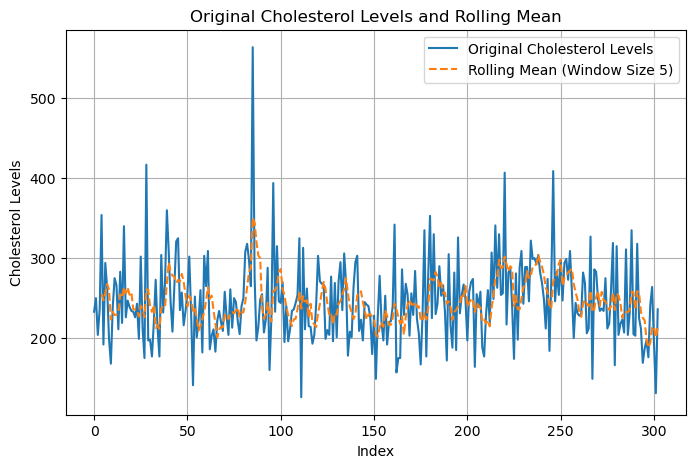

In [35]:
# Rolling mean analysis on cholesterol levels (window size 5)
rolling_mean = data["chol"].rolling(window=5).mean()

plt.figure(figsize=(8, 5))
plt.plot(data["chol"], label="Original Cholesterol Levels")
plt.plot(rolling_mean, label="Rolling Mean (Window Size 5)", linestyle='--')  # Include the rolling mean plot
plt.xlabel("Index")
plt.ylabel("Cholesterol Levels")
plt.title("Original Cholesterol Levels and Rolling Mean")
plt.legend()  # Show legend
plt.grid()  # Show grid
plt.show()


In [20]:
patient_data = {
    "age": 65,
    "sex": 1,
    "cp": 3,
    "chol": 220,  # Add the cholesterol value here (replace with actual value)
    # Other features...
}

In [22]:
patient_data.setdefault("chol", 0)

220

In [23]:
if "chol" not in patient_data:
    raise ValueError("Missing cholesterol data for patient prediction")

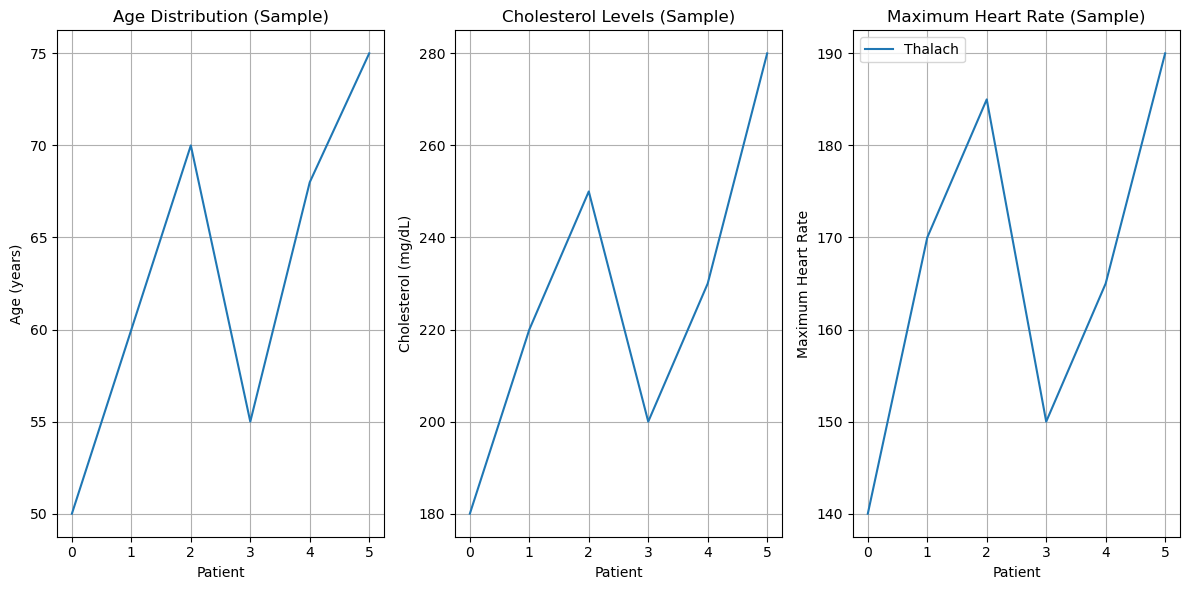

In [25]:
ages = [50, 60, 70, 55, 68, 75]
cholesterol = [180, 220, 250, 200, 230, 280]
thalach = [140, 170, 185, 150, 165, 190]

# Subplots for age, cholesterol, and thalach
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(ages, label="Age")
plt.xlabel("Patient")
plt.ylabel("Age (years)")
plt.title("Age Distribution (Sample)")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(cholesterol, label="Cholesterol")
plt.xlabel("Patient")
plt.ylabel("Cholesterol (mg/dL)")
plt.title("Cholesterol Levels (Sample)")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(thalach, label="Thalach")
plt.xlabel("Patient")
plt.ylabel("Maximum Heart Rate")
plt.title("Maximum Heart Rate (Sample)")
plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()